In [1]:
import pandas as pd

In [7]:
original_df = pd.read_csv('../original/processed_data.csv')
original_df.head()

,mora,atraso,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,clasif_sbs,v_alquilado,v_familiar,v_propietario,neduc_secundaria,neduc_sin_educacion,neduc_tecnica,neduc_universitaria
0,0,18,32,4598,9.000000,12,900.0,1824.67,1933.75,175,1,False,True,False,False,False,True,False
1,0,0,26,5148,8.000000,2,2400.0,2797.38,188.29,187,0,False,True,False,False,False,False,True
2,0,0,46,3960,32.401583,1,3100.0,2000.00,11010.65,189,0,False,True,False,False,False,True,False
3,0,22,25,4874,9.000000,12,2200.0,449.92,496.58,220,0,False,True,False,False,False,False,True
4,0,9,30,3930,12.000000,8,2100.0,4827.64,850.21,193,0,False,True,False,False,False,False,True


In [15]:
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=original_df)

# This is kind of parameters we can mess to get better results
synthetizer = CTGANSynthesizer(
    epochs=1000,
    batch_size=2000,
    verbose=True,
    metadata=metadata
)
synthetizer.fit(original_df)

/Users/thiagosantos/Documents/DatosSinteticos/.venv/lib/python3.12/site-packages/sdv/single_table/base.py:145: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/Users/thiagosantos/Documents/DatosSinteticos/.venv/lib/python3.12/site-packages/sdv/single_table/base.py:123: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Gen. (-0.79) | Discrim. (-0.06): 100%|██████████| 1000/1000 [04:49<00:00,  3.45it/s]


In [16]:
synthetic_data = synthetizer.sample(num_rows=len(original_df))
synthetic_data.head()


,mora,atraso,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,clasif_sbs,v_alquilado,v_familiar,v_propietario,neduc_secundaria,neduc_sin_educacion,neduc_tecnica,neduc_universitaria
0,1,0,29,5272,33.826738,12,17045.44,24384.94,1776.08,217,0,False,False,True,False,False,False,True
1,0,0,35,5650,11.098422,12,1778.64,10211.03,2124.60,200,0,False,False,False,False,False,True,False
2,1,0,41,4634,32.902539,12,10030.68,1680.35,446.79,228,2,False,False,True,False,False,False,True
3,0,1,25,6735,14.419532,12,965.83,1093.93,2433.62,172,0,False,True,False,False,False,True,False
4,0,0,40,4850,31.059372,12,3057.85,14656.70,169.68,221,0,False,False,False,False,False,False,True


In [17]:
from utils import compare_datasets

=== Overall Dataset Comparison ===

Original Dataset Shape: (6942, 18)
Synthetic Dataset Shape: (6942, 18)

=== Numerical Columns Statistics ===

mora:
Original - Mean: 0.6964851627772977 Std: 0.4598086956442679
Synthetic - Mean: 0.7084413713627197 Std: 0.45451287438374194
KS Test p-value: 0.7039


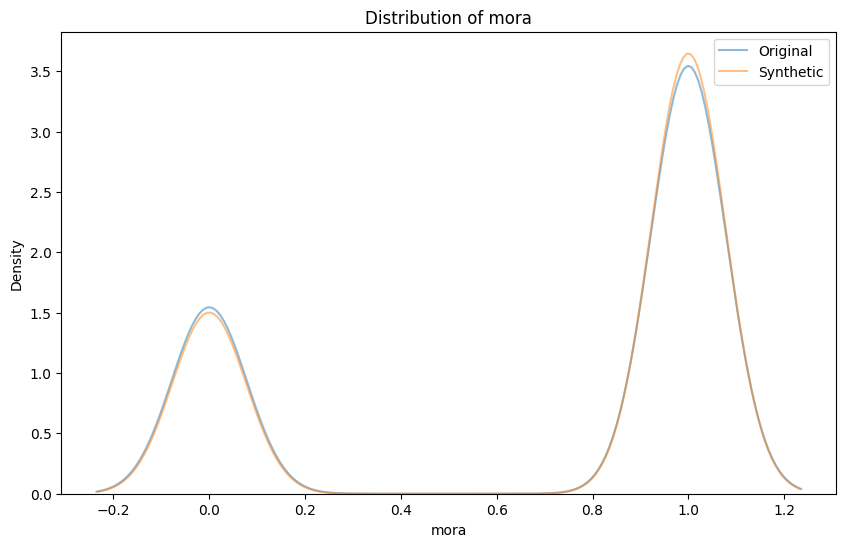


atraso:
Original - Mean: 4.598530682800345 Std: 14.43106364404317
Synthetic - Mean: 5.594209161624892 Std: 10.457919789748528
KS Test p-value: 0.0000


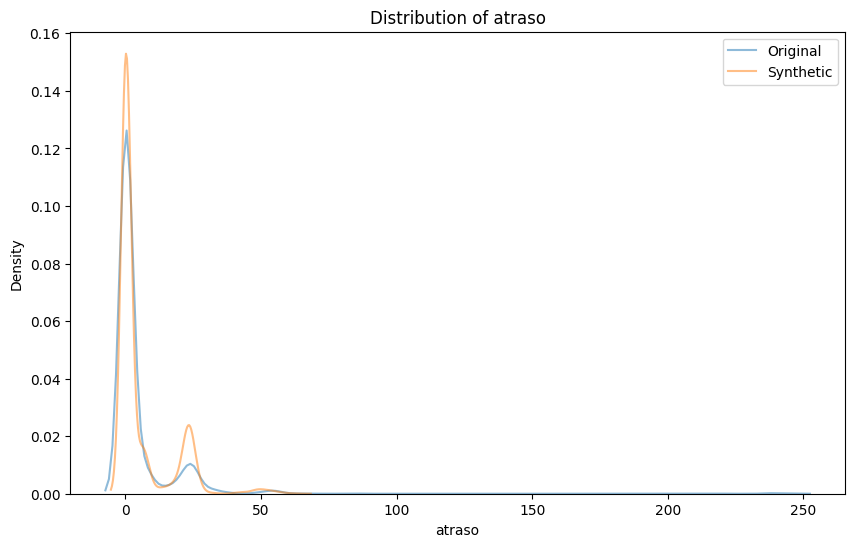


edad:
Original - Mean: 36.49294151541343 Std: 9.748007484901512
Synthetic - Mean: 38.14174589455488 Std: 10.341137895980552
KS Test p-value: 0.0000


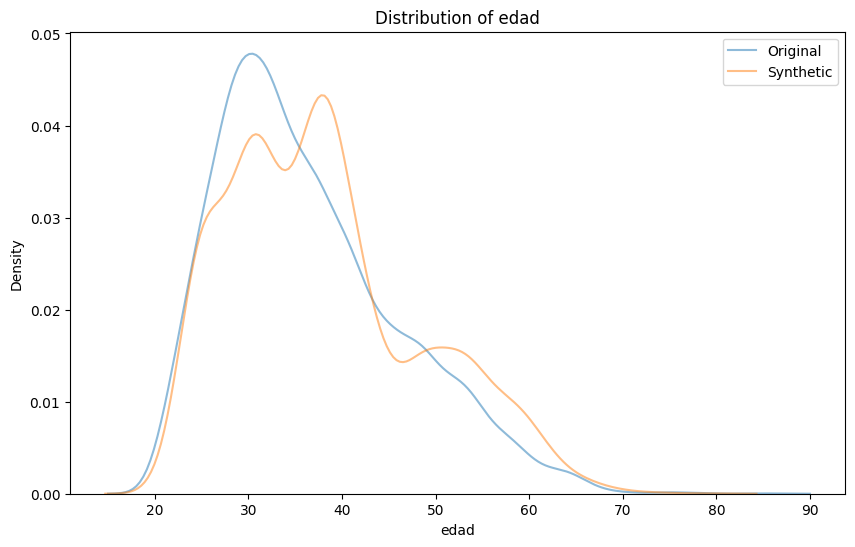


dias_lab:
Original - Mean: 5594.509363295881 Std: 2170.4833342315324
Synthetic - Mean: 5861.23177758571 Std: 2227.205713320983
KS Test p-value: 0.0000


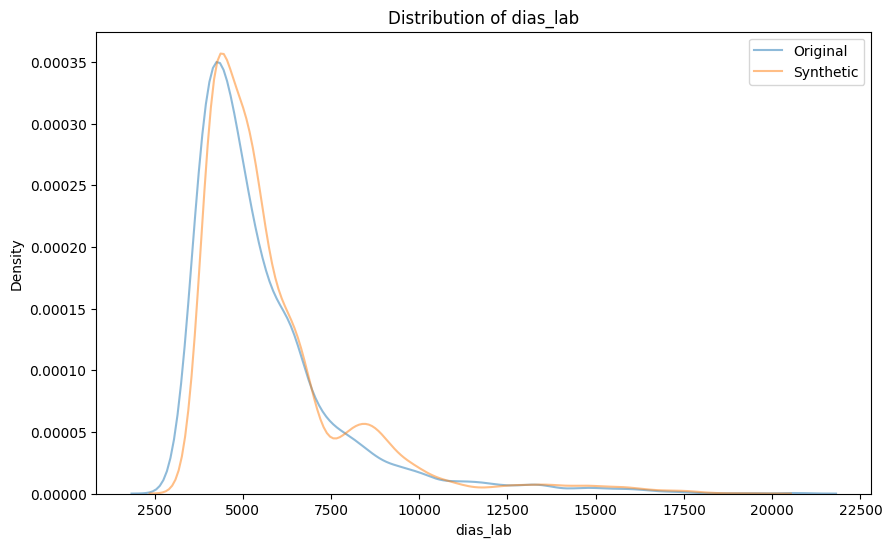


exp_sf:
Original - Mean: 31.954010282619638 Std: 31.028187432503348
Synthetic - Mean: 28.68606530685712 Std: 28.471957784180372
KS Test p-value: 0.0000


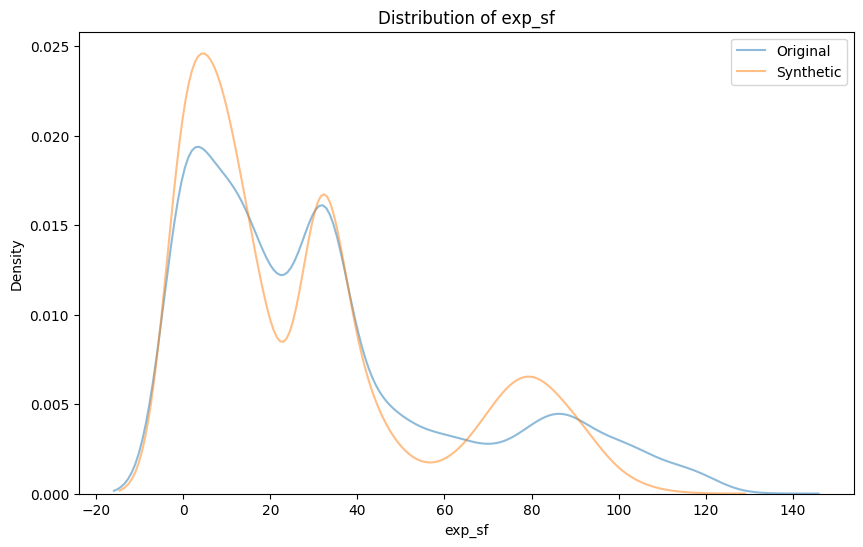


nivel_ahorro:
Original - Mean: 10.523192163641601 Std: 3.4683363265242284
Synthetic - Mean: 10.876548545087871 Std: 3.155646419134471
KS Test p-value: 0.0000


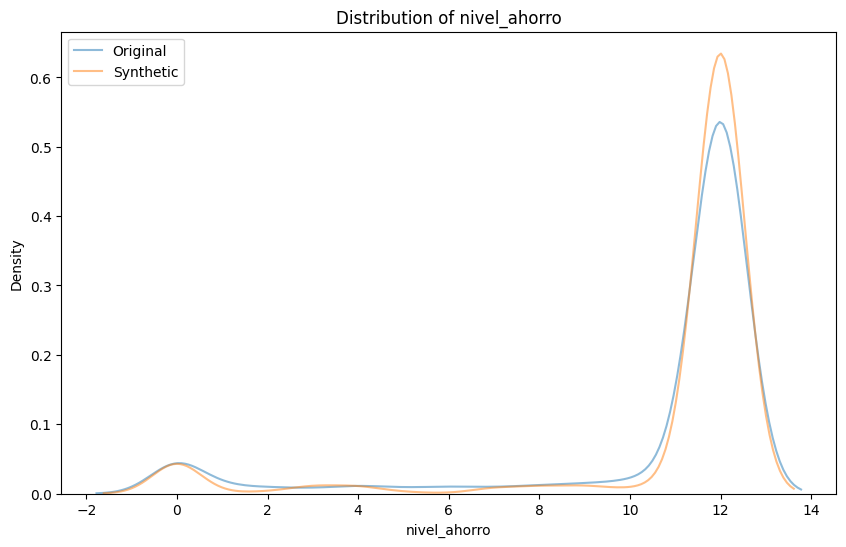


ingreso:
Original - Mean: 4588.289419475655 Std: 5549.859916700019
Synthetic - Mean: 5468.5903673293 Std: 6426.205150333853
KS Test p-value: 0.0000


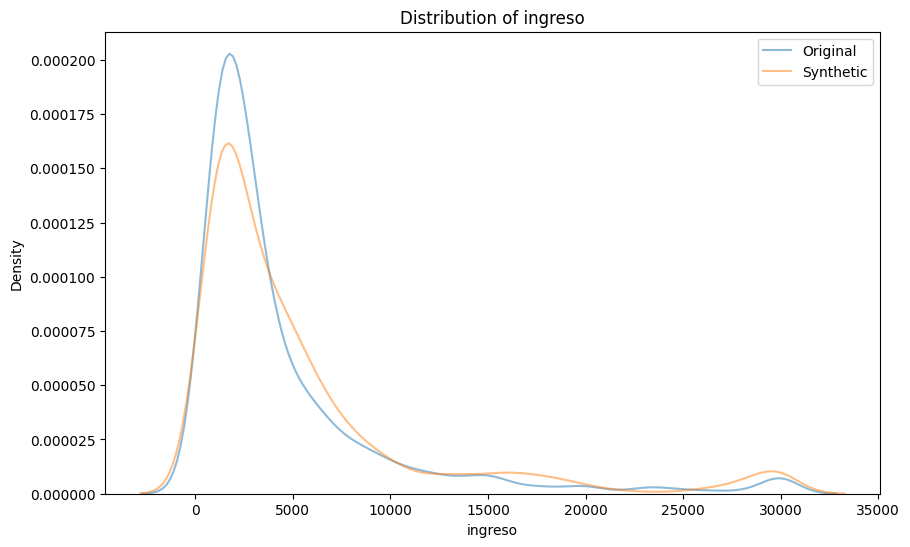


linea_sf:
Original - Mean: 12007.545795159896 Std: 21554.353544433332
Synthetic - Mean: 11927.365459521754 Std: 21266.050194869666
KS Test p-value: 0.0053


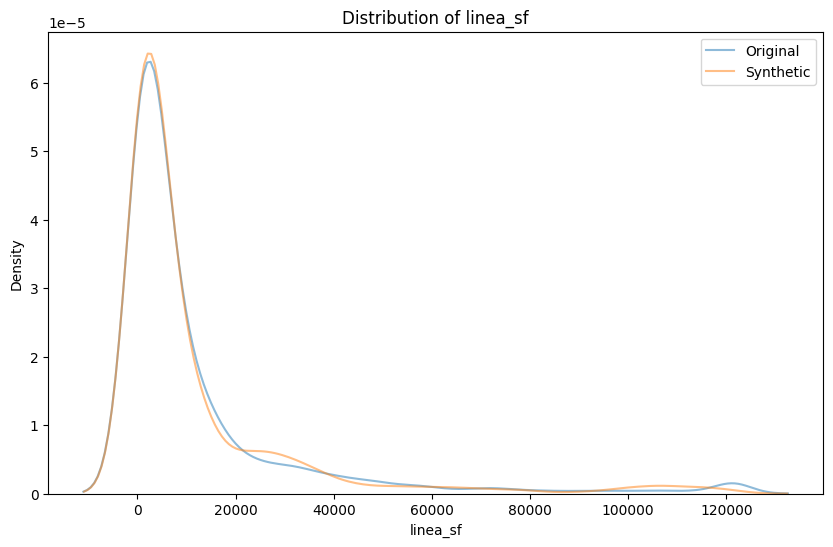


deuda_sf:
Original - Mean: 6334.580079227888 Std: 11633.909201174101
Synthetic - Mean: 4430.145515701527 Std: 9304.338562989196
KS Test p-value: 0.0000


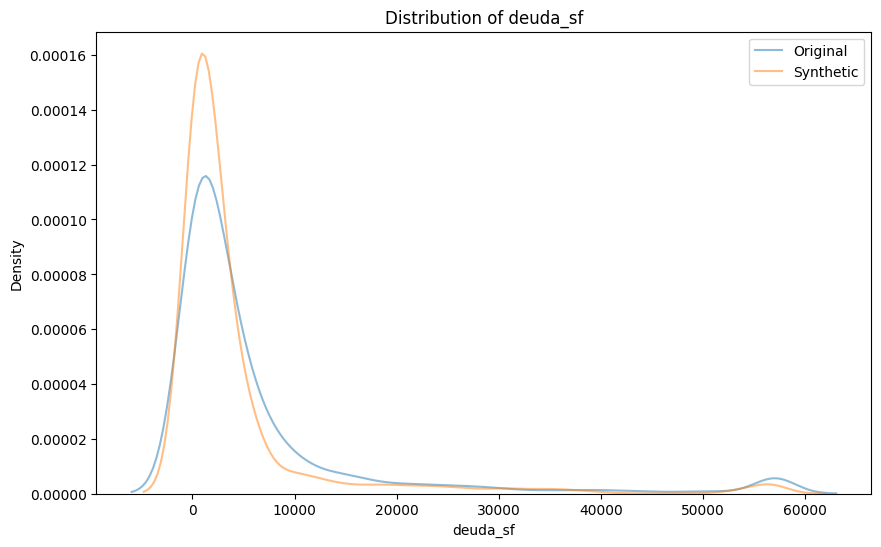


score:
Original - Mean: 197.52391241717083 Std: 19.39303568177828
Synthetic - Mean: 195.1106309420916 Std: 20.281959437160975
KS Test p-value: 0.0000


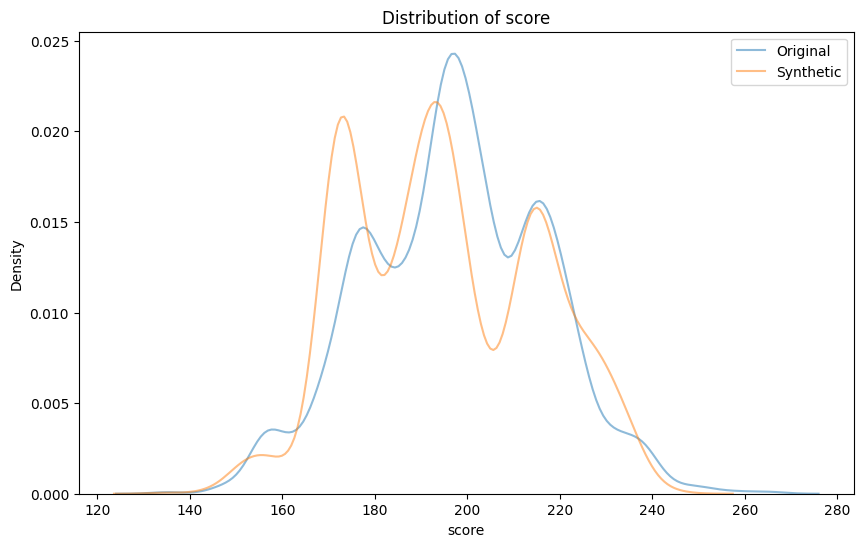


clasif_sbs:
Original - Mean: 0.5940651109190435 Std: 0.9023872581441054
Synthetic - Mean: 0.6042927110342841 Std: 0.9993508970413029
KS Test p-value: 0.0000


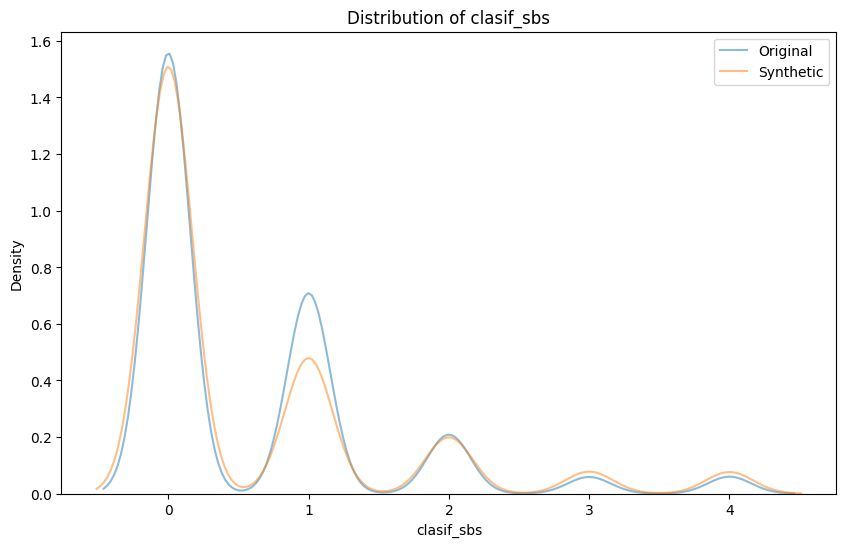


=== Categorical Columns Statistics ===

=== Correlation Comparison ===


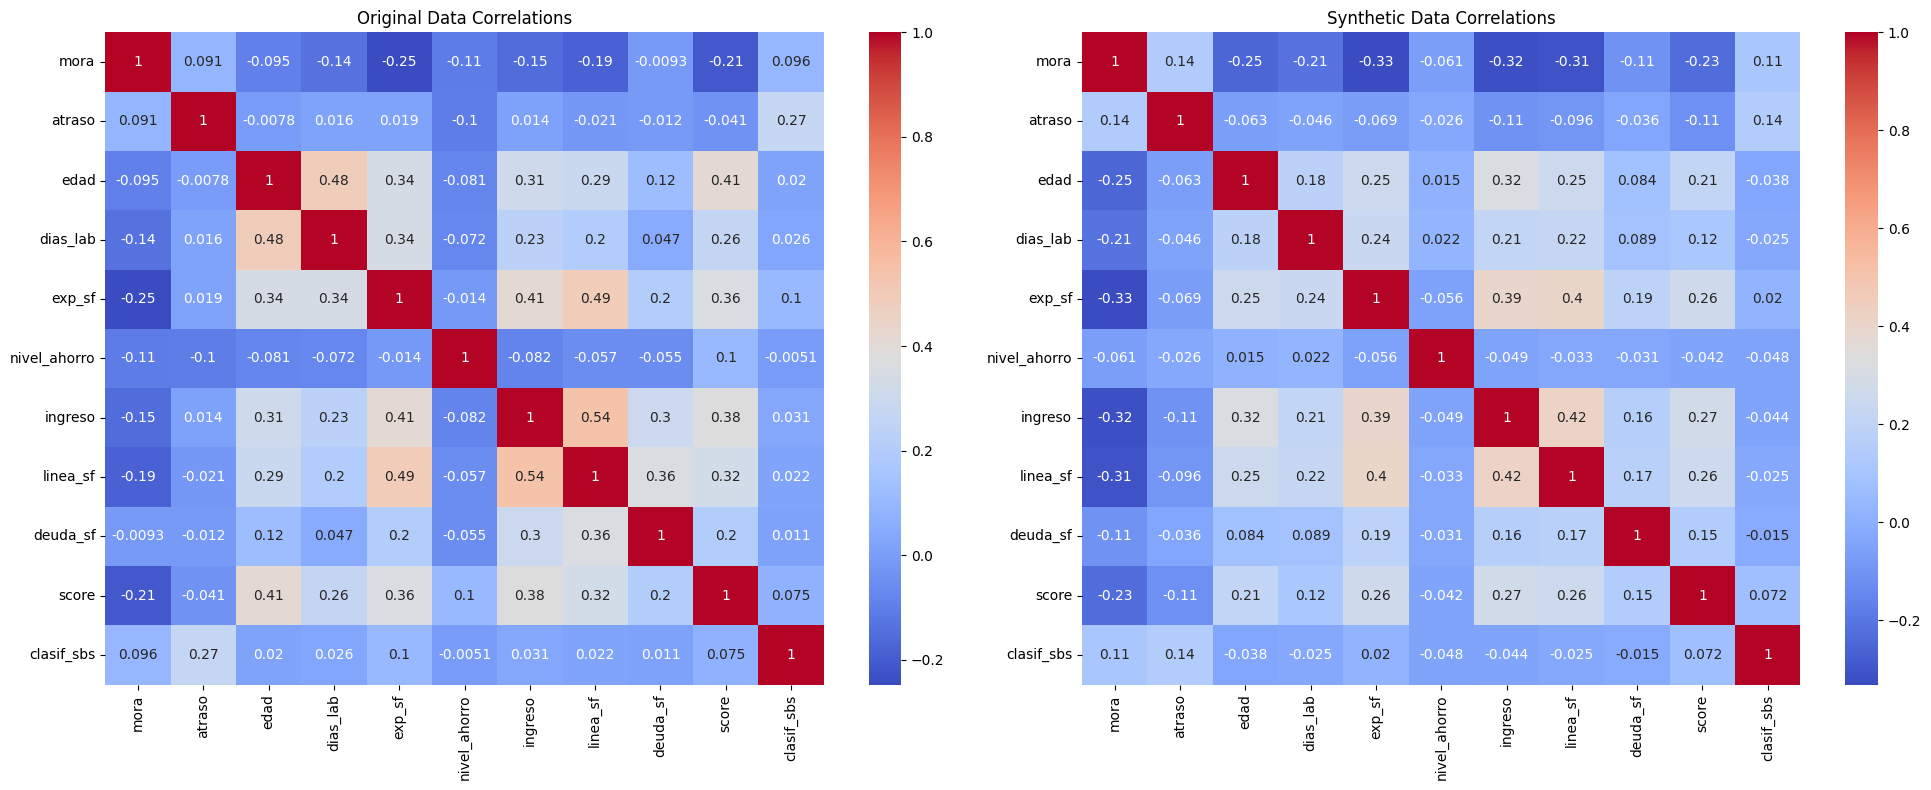

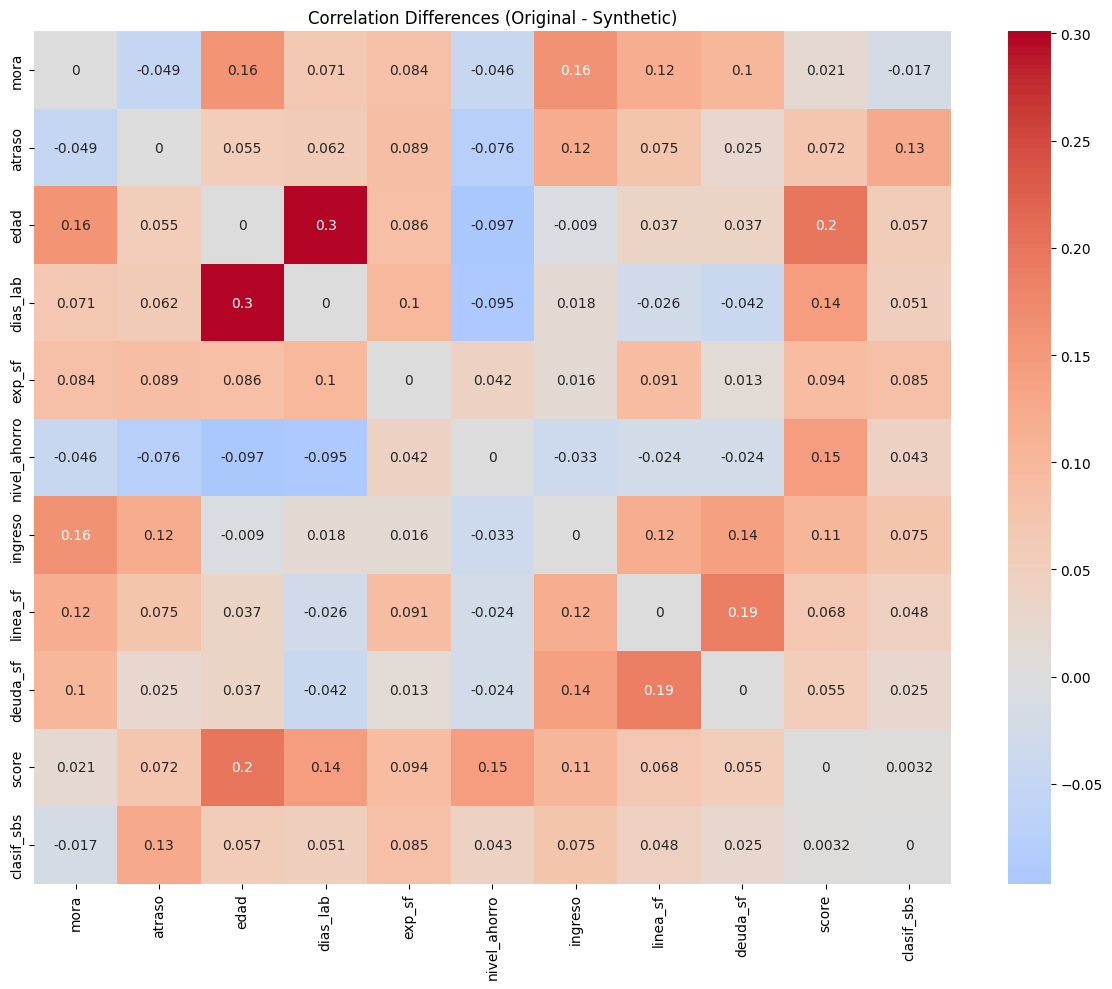

In [18]:
compare_datasets(original_df, synthetic_data)